### Importación de datos



In [10]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,"283,600","15,300",04/08/2021,Izabela de León,Medellín,1,Nequi,1,6,-76
1,Pandereta,Instrumentos musicales,"76,800","2,300",26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6,-76
2,Cama king,Muebles,"443,300","23,800",22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,5,-76
3,Cama king,Muebles,"906,200","46,400",04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3,-77
4,Silla de oficina,Muebles,"397,800","19,400",26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,5,-74


#1. Análisis de facturación



In [11]:
pd.options.display.float_format = '{:,.0f}'.format

facturacion_df = pd.DataFrame({
    'Tienda': ['Tienda', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Facturación Total': [
        tienda['Precio'].sum(),
        tienda2['Precio'].sum(),
        tienda3['Precio'].sum(),
        tienda4['Precio'].sum()
    ]
})

facturacion_df = facturacion_df.sort_values(by='Facturación Total', ascending=False)
facturacion_df

,Tienda,Facturación Total
0,Tienda,"1,150,880,400"
1,Tienda 2,"1,116,343,500"
2,Tienda 3,"1,098,019,600"
3,Tienda 4,"1,038,375,700"


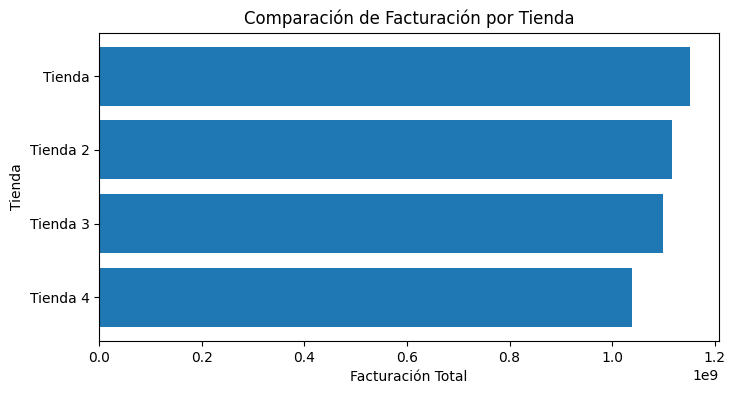

In [12]:
plt.figure(figsize=(8, 4))
plt.barh(facturacion_df['Tienda'], facturacion_df['Facturación Total'])
plt.xlabel('Facturación Total')
plt.ylabel('Tienda')
plt.title('Comparación de Facturación por Tienda')
plt.gca().invert_yaxis()  # para que la tienda con mayor facturación aparezca arriba
plt.show()

# 2. Ventas por categoría

In [13]:
ventas_categoria_df = pd.DataFrame({
    "Tienda": tienda['Categoría del Producto'].value_counts(),
    "Tienda 2": tienda2['Categoría del Producto'].value_counts(),
    "Tienda 3": tienda3['Categoría del Producto'].value_counts(),
    "Tienda 4": tienda4['Categoría del Producto'].value_counts()
}).fillna(0).astype(int)

ventas_categoria_df

,Tienda,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


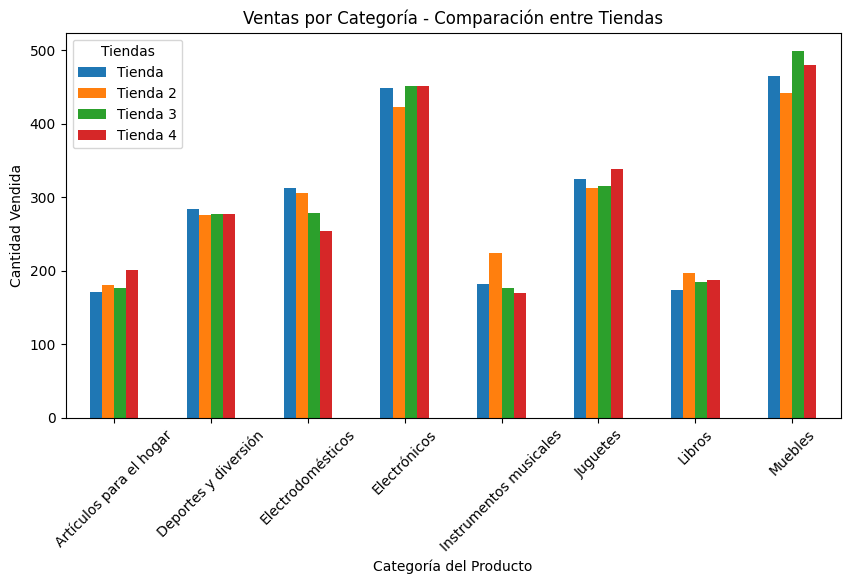

In [14]:

ventas_categoria_df.plot(kind='bar', figsize=(10,5))
plt.title("Ventas por Categoría - Comparación entre Tiendas")
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.legend(title="Tiendas")
plt.show()

# 3. Calificación promedio de la tienda


In [20]:
calificacion_df = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificación Promedio": [
        tienda['Calificación'].mean(),
        tienda2['Calificación'].mean(),
        tienda3['Calificación'].mean(),
        tienda4['Calificación'].mean()
    ]
})
calificacion_df['Calificación Promedio'] = calificacion_df['Calificación Promedio'].round(3)
calificacion_df

,Tienda,Calificación Promedio
0,Tienda 1,4
1,Tienda 2,4
2,Tienda 3,4
3,Tienda 4,4


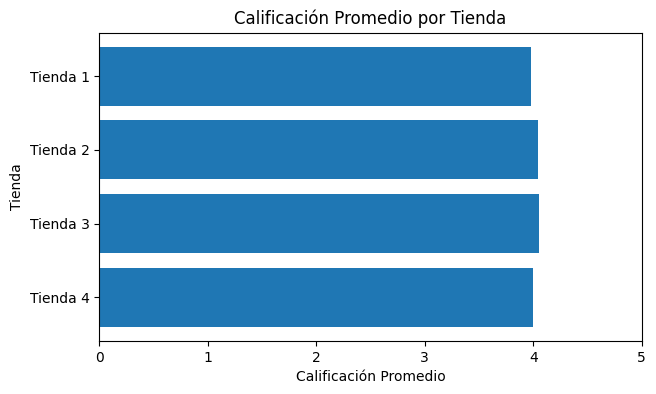

In [17]:
plt.figure(figsize=(7,4))
plt.barh(calificacion_df['Tienda'], calificacion_df['Calificación Promedio'])
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Calificación Promedio')
plt.ylabel('Tienda')
plt.xlim(0, 5)
plt.gca().invert_yaxis()
plt.show()

# 4. Productos más y menos vendidos

In [22]:
productos_df = pd.DataFrame({
    "Tienda 1": tienda['Producto'].value_counts(),
    "Tienda 2": tienda2['Producto'].value_counts(),
    "Tienda 3": tienda3['Producto'].value_counts(),
    "Tienda 4": tienda4['Producto'].value_counts()
}).fillna(0).astype(int)

productos_df

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Producto,,,,
Ajedrez de madera,49,45,47,39
Armario,60,54,49,34
Asistente virtual,40,38,39,50
Auriculares,50,37,43,44
Auriculares con micrófono,33,44,39,42
Balón de baloncesto,55,42,50,50
Balón de voleibol,42,46,48,48
Batería,53,61,41,48
Bicicleta,54,45,52,45


In [23]:
mas_vendidos = pd.DataFrame({
    "Tienda 1 (Más vendido)": [productos_df['Tienda 1'].idxmax(), productos_df['Tienda 1'].max()],
    "Tienda 2 (Más vendido)": [productos_df['Tienda 2'].idxmax(), productos_df['Tienda 2'].max()],
    "Tienda 3 (Más vendido)": [productos_df['Tienda 3'].idxmax(), productos_df['Tienda 3'].max()],
    "Tienda 4 (Más vendido)": [productos_df['Tienda 4'].idxmax(), productos_df['Tienda 4'].max()]
}, index=["Producto", "Cantidad"])

mas_vendidos

,Tienda 1 (Más vendido),Tienda 2 (Más vendido),Tienda 3 (Más vendido),Tienda 4 (Más vendido)
Producto,Armario,Iniciando en programación,Kit de bancas,Cama box
Cantidad,60,65,57,62


In [24]:
menos_vendidos = pd.DataFrame({
    "Tienda 1 (Menos vendido)": [productos_df['Tienda 1'].idxmin(), productos_df['Tienda 1'].min()],
    "Tienda 2 (Menos vendido)": [productos_df['Tienda 2'].idxmin(), productos_df['Tienda 2'].min()],
    "Tienda 3 (Menos vendido)": [productos_df['Tienda 3'].idxmin(), productos_df['Tienda 3'].min()],
    "Tienda 4 (Menos vendido)": [productos_df['Tienda 4'].idxmin(), productos_df['Tienda 4'].min()]
}, index=["Producto", "Cantidad"])

menos_vendidos

,Tienda 1 (Menos vendido),Tienda 2 (Menos vendido),Tienda 3 (Menos vendido),Tienda 4 (Menos vendido)
Producto,Auriculares con micrófono,Juego de mesa,Bloques de construcción,Guitarra eléctrica
Cantidad,33,32,35,33


In [26]:
prod_t1 = tienda['Producto'].value_counts()
prod_t2 = tienda2['Producto'].value_counts()
prod_t3 = tienda3['Producto'].value_counts()
prod_t4 = tienda4['Producto'].value_counts()

# Construcción del DataFrame final
productos_comparativo = pd.DataFrame({
    "Tienda 1": [
        f"{prod_t1.idxmax()} ({prod_t1.max()})",
        f"{prod_t1.idxmin()} ({prod_t1.min()})"
    ],
    "Tienda 2": [
        f"{prod_t2.idxmax()} ({prod_t2.max()})",
        f"{prod_t2.idxmin()} ({prod_t2.min()})"
    ],
    "Tienda 3": [
        f"{prod_t3.idxmax()} ({prod_t3.max()})",
        f"{prod_t3.idxmin()} ({prod_t3.min()})"
    ],
    "Tienda 4": [
        f"{prod_t4.idxmax()} ({prod_t4.max()})",
        f"{prod_t4.idxmin()} ({prod_t4.min()})"
    ]
}, index=["Más vendido", "Menos vendido"])

productos_comparativo

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Más vendido,Microondas (60),Iniciando en programación (65),Kit de bancas (57),Cama box (62)
Menos vendido,Auriculares con micrófono (33),Juego de mesa (32),Bloques de construcción (35),Guitarra eléctrica (33)


# 5. Envío promedio por tienda

In [29]:
pd.options.display.float_format = '{:,.2f}'.format

envio_promedio_df = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Envío Promedio": [
        tienda['Costo de envío'].mean(),
        tienda2['Costo de envío'].mean(),
        tienda3['Costo de envío'].mean(),
        tienda4['Costo de envío'].mean()
    ]
})

envio_promedio_df

,Tienda,Envío Promedio
0,Tienda 1,"26,018.61"
1,Tienda 2,"25,216.24"
2,Tienda 3,"24,805.68"
3,Tienda 4,"23,459.46"


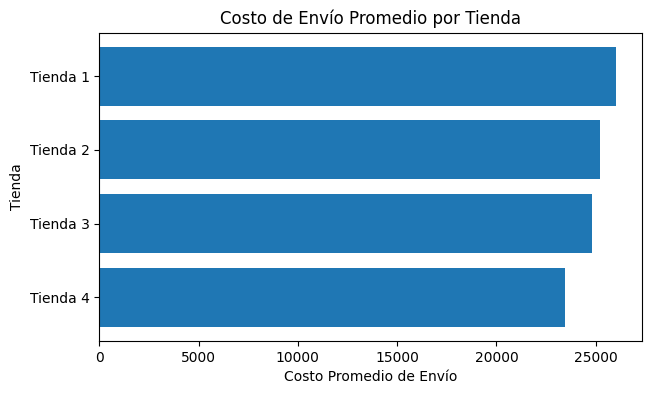

In [30]:
plt.figure(figsize=(7,4))
plt.barh(envio_promedio_df['Tienda'], envio_promedio_df['Envío Promedio'])
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Costo Promedio de Envío')
plt.ylabel('Tienda')
plt.gca().invert_yaxis()  # coloca la tienda con mayor costo arriba
plt.show()


**Conclusión General y Hallazgos Relevantes**

El análisis comparativo entre las cuatro tiendas revela un desempeño comercial bastante equilibrado, aunque con diferencias que permiten orientar una decisión estratégica.

**1. Facturación**

Tienda 1 muestra la mayor facturación, seguida muy de cerca por Tienda 2.

Tienda 4 presenta la facturación más baja.

Esto indica que Tienda 4 genera menor volumen de ingresos, lo que reduce su aporte al negocio.

**2. Ventas por categoría**

Las categorías con mayor demanda son Electrónicos, Muebles y Juguetes en las cuatro tiendas.

No se observan diferencias significativas en la estructura de ventas por categoría entre tiendas.

Sin embargo, la Tienda 3 destaca en Muebles y Electrónicos, lo que indica una mayor fuerza en categorías de alto ticket promedio.

**3. Calificación promedio**

Las cuatro tiendas presentan una calificación promedio de 4, lo que indica satisfacción homogénea de los clientes.

Por lo tanto, la decisión de cierre no debe basarse en experiencia del cliente, ya que no hay brechas significativas.

**4. Productos más y menos vendidos**

Cada tienda tiene un producto líder diferente, lo que muestra diversidad en la demanda según el perfil de cliente.

Sin embargo:

Tienda 4 tiene su producto menos vendido con una rotación particularmente baja, lo que sugiere mayor riesgo de inventario inmovilizado.

**5. Costos Logísticos (Envío Promedio)**

Tienda 1 presenta el costo promedio de envío más alto (~26,018).

Tienda 4 presenta el menor costo de envío (~23,459), lo cual a priori sería positivo, pero su menor facturación puede indicar que simplemente maneja menor volumen, resultando en menor eficiencia operativa.

**Hallazgo Clave**


Aunque los indicadores muestran resultados similares, la Tienda 4 destaca negativamente por:

Menor facturación total

Menor volumen de ventas en categorías clave

Menor desempeño del producto más vendido frente a las otras tiendas

Inventario con menor rotación en su producto menos vendido

A pesar de tener un costo de envío ligeramente menor, este no compensa el bajo nivel de ingresos y rotación, lo cual implica menor contribución marginal al negocio.

**Recomendación Final**

Si la organización necesita cerrar una tienda, los indicadores sugieren que la Tienda 4 es la candidata más estratégica para cierre, dado que:

Su aporte a ingresos es el más bajo.

Presenta menor fuerza de rotación de productos.

No presenta ventajas competitivas en ventas por categoría.

Su costo logístico no proporciona una ventaja suficiente para justificar su continuidad.

Por lo tanto, el cierre de la Tienda 4 permitiría reducir costos fijos y de operación, sin comprometer significativamente los niveles de venta global del negocio.